In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [4]:
df = pd.concat([df_train,df_test])

In [5]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [6]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [7]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [8]:
# df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [9]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [10]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [11]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [12]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [13]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Instead of one hot encoding we will try label encoding to convert the categorical values to numerical ones.

In [14]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['protocol_type', 'service', 'flag']

label_encoder = LabelEncoder()

for i in categorical_columns:
  df[i]= label_encoder.fit_transform(df[i])


In [15]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,44,9,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,24,9,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,24,9,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,1,49,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,1,51,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,1,49,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


### Scaling numericals values

In [16]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes","protocol_type", "service", "flag", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

In [17]:
df_preprocessed = df.copy()

In [18]:
df_preprocessed.shape

(148517, 42)

In [19]:
df_preprocessed.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.588235,0.098039,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.0,1.000000,0.003922,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.0,1.000000,0.101961,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune


In [20]:
df_preprocessed_corr = df_preprocessed.copy()

In [21]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [22]:
df_preprocessed_corr.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.003914,0.003914,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.025440,0.001957,0.0,0.00,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.240705,0.011742,1.0,1.00,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.009785,0.009785,0.2,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.058708,0.062622,0.0,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
5,0.0,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.236791,0.037182,0.0,0.00,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
6,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.324853,0.017613,1.0,1.00,0.0,0.0,0.05,0.06,0.00,1.000000,0.035294,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
7,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.228963,0.031311,1.0,1.00,0.0,0.0,0.14,0.06,0.00,1.000000,0.058824,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
8,0.0,0.5,0.739130,0.5,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.528376,0.045010,1.0,1.00,0.0,0.0,0.09,0.05,0.00,1.000000,0.090196,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
9,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.260274,0.015656,1.0,1.00,0.0,0.0,0.06,0.06,0.00,1.000000,0.050980,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


### Finding importance of each feature

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_preprocessed_corr.corr()

plt.figure(figsize=(100, 100))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title("Correlation Matrix", fontsize=16)

plt.show()

In [24]:
correlation_matrix = df_preprocessed_corr.corr()
correlation_matrix

label_correlations = correlation_matrix['label'].sort_values(ascending=False)

print(f"Correlation with label (target attribute)\n: {label_correlations}")


Correlation with label (target attribute)
: label                          1.000000
same_srv_rate                  0.708911
dst_host_srv_count             0.692577
dst_host_same_srv_rate         0.667624
logged_in                      0.664117
flag                           0.629556
protocol_type                  0.271630
srv_diff_host_rate             0.113183
num_access_files               0.035478
su_attempted                   0.021545
num_file_creations             0.017585
srv_count                      0.015006
root_shell                     0.013468
num_root                       0.011165
num_compromised                0.009900
hot                            0.009637
num_shells                     0.000259
dst_bytes                     -0.003583
is_guest_login                -0.003839
urgent                        -0.003862
src_bytes                     -0.005457
is_host_login                 -0.007835
land                          -0.008817
num_failed_logins             -0.042

### Attributes with high positive correlation with label
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* flag                           = 0.629556


### Attributes with high negative correlation with label
* count                      =    -0.524108
* srv_serror_rate            =    -0.586636
* serror_rate                =    -0.588474
* dst_host_serror_rate       =    -0.589936
* dst_host_srv_serror_rate   =    -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [25]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0], dtype=int64)

### Feature importance

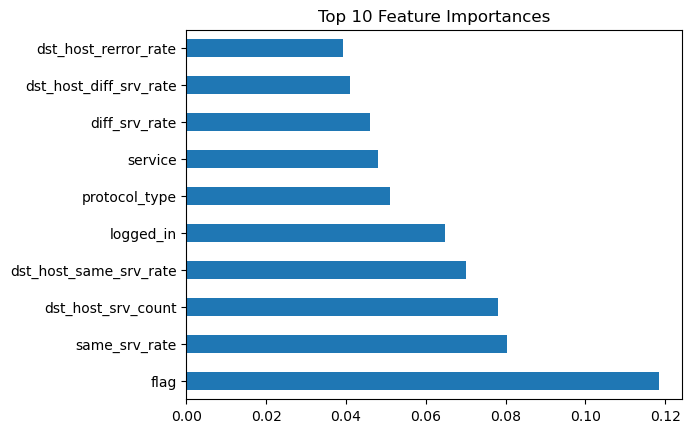

In [26]:
from sklearn.ensemble import RandomForestClassifier

X = df_preprocessed_corr.drop('label', axis=1)
y = df_preprocessed_corr['label']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

### Normal and Anomalous traffic data after preprocessing

In [27]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [28]:
normal_traffic_preprocessed.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.00000,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.003914,0.003914,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.00000,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.025440,0.001957,0.0,0.00,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
3,0.00000,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.009785,0.009785,0.2,0.20,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.00000,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.058708,0.062622,0.0,0.00,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
12,0.00000,0.5,0.347826,0.9,2.079765e-07,1.718403e-06,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.005871,0.013699,0.0,0.00,0.0,0.0,1.00,0.00,0.43,0.031373,0.858824,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal
16,0.00000,0.5,0.347826,0.9,2.173970e-07,1.052569e-05,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.015656,0.017613,0.0,0.11,0.0,0.0,1.00,0.00,0.22,0.356863,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal
18,0.00000,0.5,0.347826,0.9,1.688450e-07,4.702515e-07,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.005871,0.005871,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.258824,1.000000,1.00,0.00,0.02,0.03,0.00,0.00,0.02,0.00,normal
19,0.00000,0.5,0.347826,0.9,2.485572e-07,8.992796e-07,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.017613,0.019569,0.0,0.00,0.0,0.0,1.00,0.00,0.20,0.615686,1.000000,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal
22,0.00000,0.5,0.347826,0.9,1.833381e-07,9.088221e-06,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.015656,0.019569,0.0,0.00,0.0,0.0,1.00,0.00,0.20,0.341176,1.000000,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal
23,0.09715,1.0,0.637681,0.9,1.065245e-07,8.015650e-08,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.001957,0.001957,0.0,0.00,0.0,0.0,1.00,0.00,0.00,1.000000,0.003922,0.00,0.85,1.00,0.00,0.00,0.00,0.00,0.00,normal


In [29]:
normal_traffic_preprocessed.shape

(77054, 42)

In [30]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [31]:
anomalous_traffic_preprocessed.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.0,1.000000,0.101961,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune
5,0.0,0.5,0.710145,0.1,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.236791,0.037182,0.0,0.0,1.0,1.0,0.16,0.06,0.0,1.000000,0.074510,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune
6,0.0,0.5,0.710145,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.324853,0.017613,1.0,1.0,0.0,0.0,0.05,0.06,0.0,1.000000,0.035294,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune
7,0.0,0.5,0.710145,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.228963,0.031311,1.0,1.0,0.0,0.0,0.14,0.06,0.0,1.000000,0.058824,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune
8,0.0,0.5,0.739130,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.528376,0.045010,1.0,1.0,0.0,0.0,0.09,0.05,0.0,1.000000,0.090196,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune
9,0.0,0.5,0.710145,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.260274,0.015656,1.0,1.0,0.0,0.0,0.06,0.06,0.0,1.000000,0.050980,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune
10,0.0,0.5,0.710145,0.1,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.401174,0.023483,0.0,0.0,1.0,1.0,0.06,0.06,0.0,1.000000,0.047059,0.05,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune
11,0.0,0.5,0.710145,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.389432,0.005871,1.0,1.0,0.0,0.0,0.02,0.06,0.0,1.000000,0.050980,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune
13,0.0,0.5,0.289855,0.9,2.420353e-07,0.0,0,0,0.0,0.0,0.0,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.007843,0.078431,1.00,0.00,1.0,0.2,0.0,0.0,0.0,0.0,warezclient
14,0.0,0.5,0.521739,0.5,0.000000e+00,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.455969,0.001957,1.0,1.0,0.0,0.0,0.00,0.06,0.0,1.000000,0.003922,0.00,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune


In [32]:
anomalous_traffic_preprocessed.shape

(71463, 42)

# Basic AutoEncoder model

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim, encoding_dim):
  input_layer = Input(shape=(input_dim,))
  encoded = Dense(encoding_dim, activation="relu")(input_layer)
  decoded = Dense(input_dim, activation="sigmoid")(encoded)
  autoencoder = Model(inputs=input_layer,outputs=decoded)

  autoencoder.compile(optimizer="adam",loss="mean_squared_error")

  return autoencoder

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [ ]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [ ]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [ ]:
x_train = train_df.drop("label",axis=1)

In [ ]:
x_train.head(5).shape

(5, 41)

In [ ]:
x_train = np.array(x_train).astype("float32")

In [ ]:

# input_dim = 41
# encoding_dim = 16
# autoencoder = create_autoencoder(input_dim, encoding_dim)
# autoencoder.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

# ae_op = autoencoder.predict(x_train)
# reconstruction_loss = autoencoder.evaluate(ae_op ,x_train)
# print(reconstruction_loss)

In [ ]:
# from keras.models import save_model

# autoencoder.save('autoencoder_model_01.h5')

In [ ]:
from keras.models import load_model

# Load the model from the file
autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder_model_01.h5')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_2 (Dense)             (None, 16)                672       
                                                                 
 dense_3 (Dense)             (None, 41)                697       
                                                                 
Total params: 1369 (5.35 KB)
Trainable params: 1369 (5.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


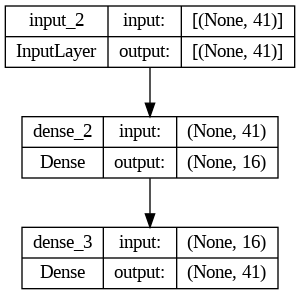

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
normal_train_output = autoencoder.predict(x_train)

2096/2096 [==============================] - 5s 2ms/step


In [ ]:
normal_train_output

array([[5.3901505e-03, 5.0202602e-01, 2.8216594e-01, ..., 3.6660801e-03,
        1.1459120e-02, 7.4593616e-03],
       [5.4557435e-02, 9.9218124e-01, 6.3993073e-01, ..., 1.5732537e-04,
        6.4810482e-04, 5.4995285e-04],
       [7.9256235e-05, 4.9785808e-01, 3.4592837e-01, ..., 2.1375827e-03,
        8.9238575e-03, 4.9290620e-03],
       ...,
       [8.2246428e-05, 5.0051248e-01, 3.4717134e-01, ..., 9.2110271e-04,
        1.0670557e-02, 7.9973713e-03],
       [5.0322508e-04, 5.0258905e-01, 3.4513521e-01, ..., 1.7521350e-04,
        9.7731012e-01, 9.2956465e-01],
       [4.1613754e-04, 9.9126023e-01, 1.7405978e-01, ..., 9.4554880e-06,
        3.6097327e-03, 3.2700901e-03]], dtype=float32)

### Calculating reconstruction loss of normal traffic data from train dataset

In [ ]:
mse_normal_train = np.mean(np.power(x_train - normal_train_output, 2), axis=1)
np.average(mse_normal_train)

0.00034032998

### Testing the model

In [ ]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [ ]:
normal_test.shape

(10000, 42)

In [ ]:
anomalous_test.shape

(71463, 42)

In [ ]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [ ]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

### Evaluating model on normal data from test dataset

In [ ]:
normal_test_op = autoencoder.predict(normal_test)

313/313 [==============================] - 1s 2ms/step


### Calculating reconstruction loss of normal traffic data from test dataset

In [ ]:
mse_normal_test = np.mean(np.power(normal_test - normal_test_op, 2), axis=1)
np.average(mse_normal_test)

0.0013048128

In [ ]:
mse_normal_test

array([0.00045225, 0.00063797, 0.00014303, ..., 0.0002716 , 0.00025008,
       0.00028495], dtype=float32)

In [ ]:
threshold = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold)

Threshold:  0.0013215435


### Find how many normal traffic data from test dataset is classified as normal

In [ ]:
normal_count=0
non_normal_count=0
for i in mse_normal_test:
  if i < threshold:
    normal_count+=1
  else:
    non_normal_count+=1
print(f"normal count : {normal_count}")
print(f"non normal count : {non_normal_count}")

normal count : 9336
non normal count : 664


### Calculating reconstruction loss of anomalous traffic data from test dataset

In [ ]:
anomalous_test_op = autoencoder.predict(anomalous_test)

2234/2234 [==============================] - 4s 2ms/step


In [ ]:
mse_anomalous_test = np.mean(np.power(anomalous_test - anomalous_test_op, 2), axis=1)
np.average(mse_anomalous_test)

# loss1 = tf.keras.losses.mae(anomalous_test_op,np.array(anomalous_test).astype("float32"))
# np.max(loss1)

0.015747564

### Find how many anomalous traffic data from test dataset is classified as normal

In [ ]:
anomalous_count=0
non_anomalous_count=0
for i in mse_anomalous_test:
  if i > threshold:
    anomalous_count+=1
  else:
    non_anomalous_count+=1
print(f"anomalous count : {anomalous_count}")
print(f"non anomalous count : {non_anomalous_count}")

anomalous count : 60012
non anomalous count : 11451


### Find how many normal traffic data from train dataset is classified as normal

In [ ]:
normal_train_count=0
non_normal_train_count=0
for i in mse_normal_train:
  if i < threshold:
    normal_train_count+=1
  else:
    non_normal_train_count+=1
print(f"normal train count : {normal_train_count}")
print(f"non normal train count : {non_normal_train_count}")

normal train count : 65370
non normal train count : 1684



* TP = 64300
* FN = 7163
* TN = 9124
* FP = 876

### Verifying evalutation metrics using code

In [ ]:
target_test = []
for i in test_df["label"]:
  if i == "normal":
    target_test += [0]
  else:
    target_test += [1]

In [ ]:
x_test = test_df.drop("label",axis=1)

In [ ]:
x_test = np.array(x_test).astype("float32")

In [ ]:
x_test_output = autoencoder.predict(x_test)

2546/2546 [==============================] - 6s 2ms/step


In [ ]:
mse_test = np.mean(np.power(x_test - x_test_output, 2), axis=1)
np.average(mse_test)

0.0139746405

In [ ]:
test_pred = []
for i in mse_test:
  if i > threshold:
    test_pred += [1]
  else:
    test_pred += [0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_test, test_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, test_pred))

Confusion Matrix:
[[ 9336   664]
 [11451 60012]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.93      0.61     10000
           1       0.99      0.84      0.91     71463

    accuracy                           0.85     81463
   macro avg       0.72      0.89      0.76     81463
weighted avg       0.92      0.85      0.87     81463



In [ ]:
# fig, ax = plt.subplots(figsize=(4, 3))
# group_names = ["TN","FP","FN","TP"]
# group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# # group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
# labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
len(x_train[0])

41

In [ ]:
# from sklearn.cluster import KMeans
# inertias = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(x_train)
#     inertias.append(kmeans.inertia_)

# plt.plot(range(1,11), inertias, marker='o')
# plt.title('Elbow method')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=4)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_4'] = y

In [ ]:
# train_df["Cluster_4"].value_counts()

In [ ]:
# kmeans = KMeans(n_clusters=5)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_5'] = y

# # train_df.head(10)

In [ ]:
# train_df["Cluster_5"].value_counts()

In [ ]:
# kmeans = KMeans(n_clusters=6)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_6'] = y

# train_df.head(10)

In [ ]:
# train_df["Cluster_6"].value_counts()

In [ ]:
# len(anomalous_test)

In [ ]:
# # kmeans.predict()
# single_data = np.array(x_train[0]).reshape(1,-1)
# kmeans.predict(single_data)

In [ ]:
# count=[0]*6
# for i in range(len(anomalous_test)):
#   single_data_anomalous = np.array(anomalous_test[i]).reshape(1,-1)
#   cluster_assignment = kmeans.predict(single_data_anomalous)[0]
#   count[cluster_assignment]+=1
# for i in range(len(count)):
#   print(f"{i} = {count[i]}")


#### Silhouette score measures how similar an object is to its own cluster compared to other clusters.

In [ ]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for k in range(2, 13):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(x_train)
#     score = silhouette_score(x_train, labels)
#     silhouette_scores.append(score)
# print(silhouette_scores)

### [0.3799493, 0.40116626, 0.40610144, 0.36659902, 0.4061593, 0.43478218, 0.445773, 0.45815152, 0.46496794, 0.46395656, 0.47388518] 2-12

In [ ]:
# from sklearn.metrics import davies_bouldin_score

# db_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = davies_bouldin_score(X, labels)
#     db_scores.append(score)
#     print(db_scores)

### Davies-Bouldin index - measures the compactness and separation of clusters
### Lower values are better
##### [0.733057668901962, 0.7555099168565746, 1.2446079968034003, 1.1909810912394254, 1.2417191950064965, 1.1911925326560844, 1.0515816505153819, 1.079250781871528, 1.0339256757596815]

In [ ]:
# from sklearn.metrics import calinski_harabasz_score

# ch_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = calinski_harabasz_score(X, labels)
#     ch_scores.append(score)


In [ ]:
# print(ch_scores)

NameError: name 'ch_scores' is not defined

### Calinski-Harabasz index - ratio of between-cluster variance to within-cluster variance.
### higher the better
##### [96118.24635601316, 124488.2438637208, 113254.57836268976, 97770.26217660471, 91165.76209128421, 85167.607224014, 80653.49465380436, 77737.98473126955, 77096.54216044008]

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x_train)


# df_visualization = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('2D PCA Representation with Clusters')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(x_train)


# import pandas as pd
# df_visualization = pd.DataFrame({'t-SNE 1': X_tsne[:, 0], 't-SNE 2': X_tsne[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('t-SNE Representation with Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Assuming you have your data points x_train

# Initialize Agglomerative Clustering model
agglomerative_model = AgglomerativeClustering(n_clusters=6)

# Fit and predict clusters
clusters = agglomerative_model.fit_predict(x_train)

# Add the cluster information to your dataframe
train_df['Cluster_Agglomerative'] = clusters

# Display the count of data points in each cluster
print(train_df['Cluster_Agglomerative'].value_counts())

NameError: name 'x_train' is not defined